---------------------
low lim hit
False -39.792 x < -50
True -20.235 y < -20
False 0.016000000000000014 z < -10
---------------------
---------------------
Dette er high lim hit
True -29.370000000000005 x > -30
False -16.1925 y > 5
False 3.8580000000000005 z > 10
---------------------
---------------------
low lim hit
False -45.994 x < -50
False -4.9825 y < -20
True -10.556000000000001 z < -10
---------------------
---------------------
low lim hit
False -42.178 x < -50
True -20.8425 y < -20
False -8.294 z < -10
---------------------
---------------------
Dette er high lim hit
False -38.344 x > -30
False -13.71 y > 5
True 10.733999999999998 z > 10
---------------------
---------------------
Dette er high lim hit
False -44.038 x > -30
True 5.835000000000001 y > 5
False 1.2800000000000002 z > 10
---------------------
---------------------
low lim hit
False -44.391999999999996 x < -50
False -15.170000000000002 y < -20
True -10.996 z < -10
---------------------
---------------------
low li

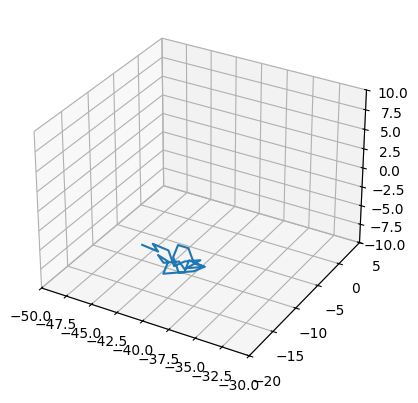

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import Circletest
import Point_In_Spheres
import Point_Maker
import Random_Spheres
import Plot_Sphere
import Volume_Of_Spheres
import Calculate_pi
import Size_of_atom
import Walkers_Task_1
import Task_9

***Topic 1***
Task 0
We use the plot function to define the box in which we will place our spheres and points

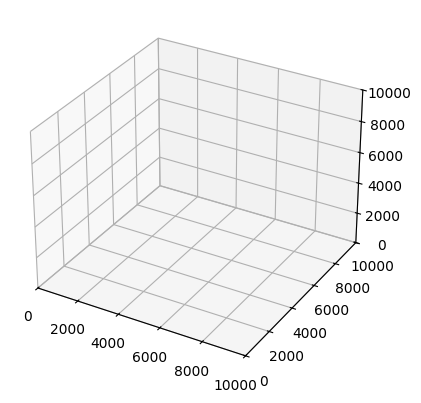

In [3]:
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

plt.show()

Task 1 We created a random point, and placed it inside the box

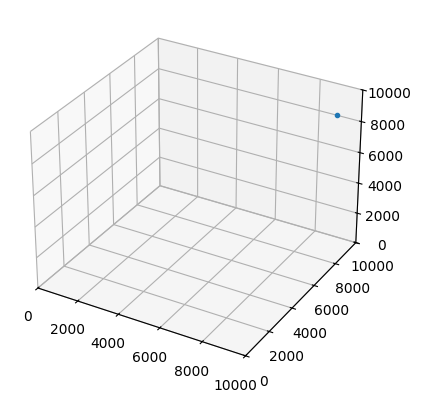

In [4]:
#Function in PointMaker make_points, makes a random point, and then places it
points = 1
point = Point_Maker.make_points(points,0,10000)#Point randomly placed in simulation box
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

ax.plot(point[:,0],point[:,1],point[:,2],'.')
plt.show()


Task 2 In this task we made a function to randomize the size and location of a sphere within the box

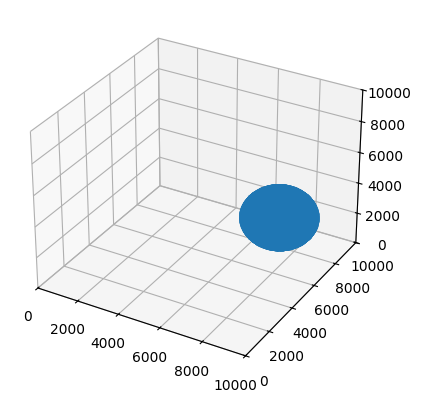

In [5]:
sphere= Random_Spheres.rand_tall_med_r(1,0,10000,5)
x,y,z =Plot_Sphere.plot_sphere(sphere)
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)
ax.plot(x,y,z,'.')
plt.show()

Task 3 This function checks if the generated point is inside a sphere, it is the special case of the function in task 4 where we are only working with a single point, hence if the sphere is inside 100 will be printed, if the point is outside 0 will be printed

In [6]:
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(sphere,point)
print(point_in/points)

0.0


Task 4, this case is the general case where we are working with multiple points. Each point is checked by the function and the fraction inside vs outside is printed, and if the number of points is large enough, the share of points randomly placed inside the spheres divided by the total number of points should approximate the same volume % as the volume of the spheres divided by the volume of the box. Because we know the volume of the box and the volume of the spheres we can just use that to see if our monte-carlo simulation is approximating the known volume.

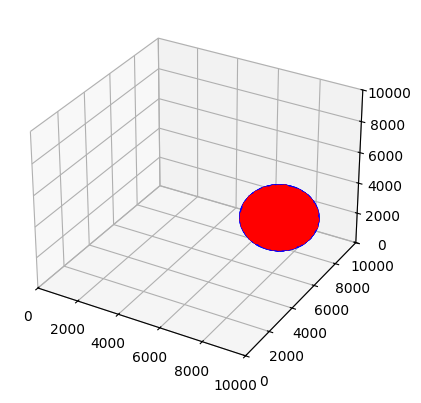

Volume calculated : 15568359892.133585
15564
1.5568359892 % chance in theory
15564 / 1000000 = 1.5564 % chance through testing


In [7]:
points = 1000000
point = Point_Maker.make_points(points,0,10000)
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(sphere,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(sphere)


ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

x,y,z =Plot_Sphere.plot_sphere(sphere)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()
print(f"Volume calculated : {volum[0]}")
print(point_in)
print(round((volum[0]/(10000**3))*100, 10),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')


Task 5. 
The volume of Pi is calculated from volume = (4/3) * pi * r ** 3.
we can reverse this function to get:
pi = volume/((4/3) * r ** 3)
The code corresponds to this function, also accounting for the fact that this function can take in multiple spheres and calculate pi from all of them.

In [8]:


print(Calculate_pi.pi_cal(sphere,point_in))

[np.float64(3.140712856026516)]


Task 6. In this task we use the same function as in task 2, except we specify to the function that we want 10 spheres.

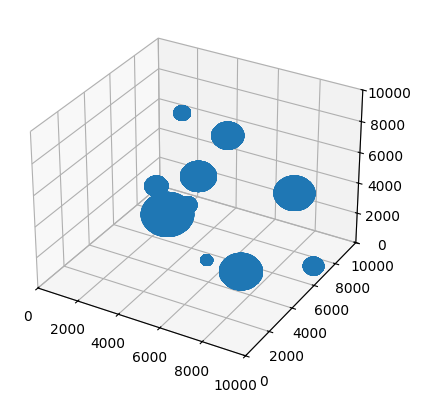

In [9]:

sphere= Random_Spheres.rand_tall_med_r(10,0,10000,10)
x,y,z =Plot_Sphere.plot_sphere(sphere)
fig = plt.figure()

ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)
ax.plot(x,y,z,'.')
plt.show()


Task 7. This function is explained in task 4, except that we are working with multiple spheres, which just means that the new volume of spheres is the volume of all spheres instead of a single sphere.

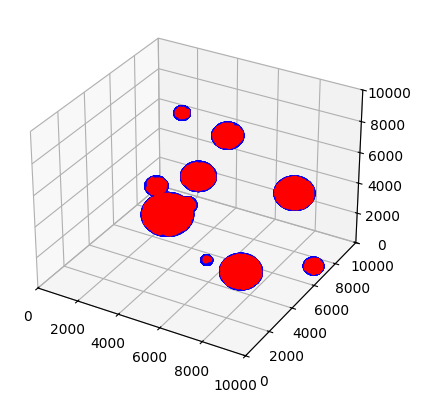

0.983697 % chance in theory
9870 / 1000000 = 0.987 % chance through testing
Volume calculated : 0.9836973038
Points inside: 9870


In [10]:
points = 1000000
point = Point_Maker.make_points(points,0,10000)
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(sphere,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(sphere)


ax = fig.add_subplot(projection="3d")
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

x,y,z =Plot_Sphere.plot_sphere(sphere)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()

volume_total = 0
for i in range(len(sphere)):
    volume_total += round((volum[i]/(10000**3))*100, 10)
print(round((volume_total),6),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')
print(f"Volume calculated : {volume_total}")
print(f"Points inside: {point_in}")

Task 8. The get dim and size of atom function reads the data from the dna_coords.txt and from it it reads the data. the values are stored in memory for the next task. Feel free to add a print statement if you want to see the results. Each atom has a size retrieved from the periodic table and is placed in its own corresponding list.

In [11]:
H,O,P,C,N,DnA = Size_of_atom.Get_dim_and_size_of_atom()#Feel free to add your own print statement, it is just not that pretty :)

Task 9. We the task_9 function will plot the DnA, we have changed the box to accommodate this slice of DnA. 

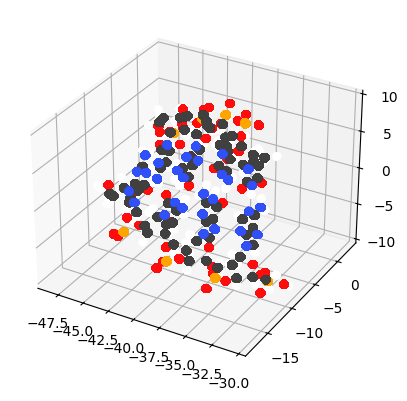

In [12]:
Task_9.task_9(H,O,P,C,N)

Task 10 Here we calculate the volume of the DnA by checking with 1 million points. and dividing this by the volume of the box to get the correct volume.
We can verify that this is correct by calculating the volume from the sizes of the atoms and their size in dna_coords.txt file in order to get the theoretical volume. 
Our problem is that out points dont give a fraction corresponding to what we would expect, as such we got stuck on this one.

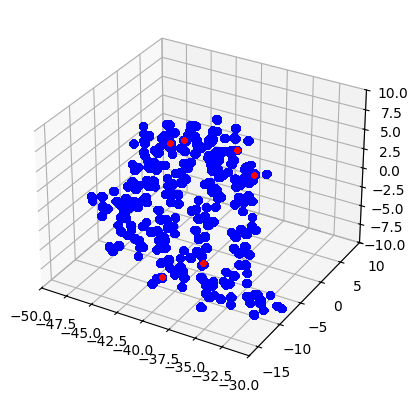

0.367228 % chance in theory
540 / 1000000 = 0.054 % chance through testing
Points inside: 540


In [13]:
points = 1000000
point_x = Point_Maker.make_points(points,-50,-30)
point_y = Point_Maker.make_points(points,-17,10)
point_z = Point_Maker.make_points(points,-10,10)
point = np.array([point_x[:, 0], point_y[:, 0], point_z[:, 0]]).T
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(DnA,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(DnA)



ax = fig.add_subplot(projection="3d")
ax.set_xlim(-50,-30)
ax.set_ylim(-17,10)
ax.set_zlim(-10,10)
x,y,z =Plot_Sphere.plot_sphere(DnA)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()

volume_total = 0
for i in range(len(DnA)):
    volume_total += round((volum[i]/(10**3))*100, 10)
print(round((volume_total),6),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')

print(f"Points inside: {point_in}")

***Topic 2***
Task  1 and 2

In [14]:
Walkers_Task_1.main(30,30)

---------------------
Dette er high lim hit
False -40.32 x > -30
False -4.484999999999999 y > 5
True 10.188 z > 10
---------------------
---------------------
Dette er high lim hit
False -42.416 x > -30
False 4.327500000000001 y > 5
True 10.899999999999999 z > 10
---------------------
---------------------
low lim hit
True -50.108000000000004 x < -50
False -0.27250000000000085 y < -20
False -3.026 z < -10
---------------------
---------------------
low lim hit
False -32.256 x < -50
True -20.24 y < -20
False 2.42 z < -10
---------------------
---------------------
Dette er high lim hit
False -32.885999999999996 x > -30
False -9.81 y > 5
True 10.324000000000002 z > 10
---------------------
---------------------
low lim hit
True -50.822 x < -50
False 3.9175000000000004 y < -20
False 4.004000000000001 z < -10
---------------------
---------------------
Dette er high lim hit
False -42.844 x > -30
False -1.3524999999999991 y > 5
True 10.823999999999998 z > 10
---------------------
----------

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (27,)  and requested shape (22,)

Task 3


In [ ]:

point(0,0,0)
x_point,y_point,z_point, point_in = Point_In_Spheres.Point_In_Spheres(sphere,point)

fig = plt.figure()
volum = Volume_Of_Spheres.volum_cal(sphere)


ax = fig.add_subplot(projection="3d")
ax.set_xlim(-50,-30)
ax.set_ylim(-20,5)
ax.set_zlim(-10,10)

x,y,z =Plot_Sphere.plot_sphere(sphere)

ax.plot(x,y,z,'.b')
ax.plot(x_point,y_point,z_point,'.r')
plt.show()

volume_total = 0
for i in range(len(sphere)):
    volume_total += round((volum[i]/(10000**3))*100, 10)
print(round((volume_total),6),"% chance in theory")
print(point_in,'/',points,'=',(point_in/points)*100,'% chance through testing')
print(f"Volume calculated : {volume_total}")
print(f"Points inside: {point_in}")

TypeError: 'numpy.ndarray' object is not callable

Task 4

task 5


Statement on the use of Ai

Audun: I did not use Ai for this lab

Individual contributions

Audun: I refactored the code into sepparate functions in sepparate files. I wrote the main projectfile and the first draft. I was helping with consultation on the code being written. I also wrote the code behind the box and the initial code for the spheres.



